[  0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.     122.5825   0.
   0.       0.       0.     127.0888 123.0259 134.6459 139.5956 141.6261
 141.6261 141.1157 142.1383   0.       0.       0.       0.     124.3655
 127.0888 126.1745 125.7198   0.       0.     170.8725 171.4905 171.4905
 172.1107 171.4905 171.4905 171.4905 171.4905 170.2567 157.2575 157.8262
 159.5448 157.8262 160.1219 160.1219 159.5448 160.1219 160.701    0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.     121.2621   0.       0.       0.     127.0888   0.
 155.0029 157.8262 145.2507   0.       0.       0.     129.8717 128.9373
 126.6308 123.4708 127.0888 129.4037 132.2372 132.2372   0.       0.
 174.6141 186.3378 201.0139 201.0139 196.7066 200.2895   0.     200.2895
 188.3669 182.3449 178.4377 169.6432 168.4227 170.8725 172.7332 172.1107
 174.6

ALSA lib pcm.c:8545:(snd_pcm_recover) underrun occurred


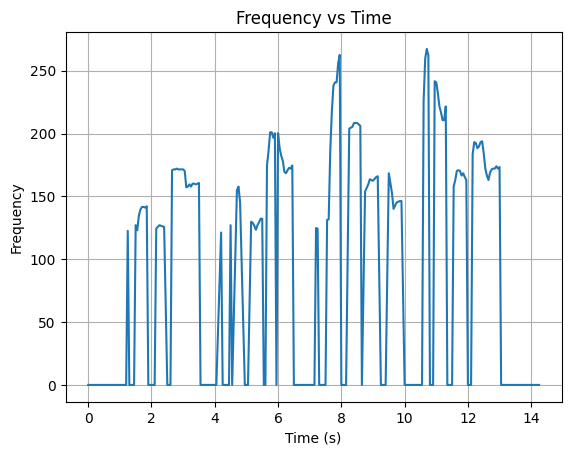

In [10]:
import pyaudio
import numpy as np
import matplotlib.pyplot as plt
import sounddevice

data = []

with open('jdcnet/output/pitch_pop4.wav.txt', 'r') as file:
    for line in file:
        line = line.strip()  # 行3先頭と末尾の空白を削除

        if line:  # 空行でない場合のみ処理を行う
            timestamp, frequency = line.split()  # スペースで行を分割
            if float(timestamp)*100 % 5 == 0:
                data.append((float(timestamp), float(frequency)))

            '''
print(data)
# タイムスタンプと周波数が記されたデータ（例）
data = [
    (0.10, 0.0000),
    (0.11, 0.0000),
    (0.12, 182.3449),
    (0.13, 182.3449),
    (0.14, 183.6663),
    (0.15, 185.6663),
    (0.16, 187.0117)
]
'''


# データから時間と周波数のリストを作成
timestamps, frequencies = zip(*data)


# 周波数データをnumpy arrayに変換
#frequencies = np.array(frequencies)

frequencies = np.array(frequencies)
frequencies2 = np.array(frequencies)
peakpoint = []
flag = 0
peak = 0
print(frequencies)

for i, f1 in enumerate(frequencies2):
    if i==0 or i==len(frequencies2)-1:
        peakpoint.append(i)
        continue
    if frequencies2[i-1]<frequencies2[i] and frequencies2[i]>=frequencies2[i+1]:
        peakpoint.append(i)
print(peakpoint)

for i, point in enumerate(peakpoint):
    if i == len(peakpoint)-1:
        continue
    templist = list(range(peakpoint[i], peakpoint[i+1]))
    for l, element in enumerate(templist):
        frequencies[element] = frequencies2[point]
        






# 音声再生関数
def play_sound(frequencies, sample_rate=44100):
    p = pyaudio.PyAudio()

    stream = p.open(format=pyaudio.paFloat32,
                    channels=1,
                    rate=sample_rate,
                    output=True)

    # 音声再生
    for frequency in frequencies:
        samples = (np.sin(2 * np.pi * np.arange(sample_rate/(5)) * frequency / sample_rate)).astype(np.float32)
        stream.write(samples)

    stream.stop_stream()
    stream.close()
    p.terminate()

# グラフのプロット
def plot_data(timestamps, frequencies):
    plt.plot(timestamps, frequencies)
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency')
    plt.title('Frequency vs Time')
    plt.grid()
    plt.show()

# 音声再生とグラフのプロット
play_sound(frequencies2)
#play_sound(frequencies)
plot_data(timestamps, frequencies2)
#plot_data(timestamps, frequencies)